In [1]:
from __future__ import absolute_import, division, print_function
%matplotlib inline
import os
import ast
#import urllib, cStringIO

import pymongo as pm

import numpy as np
import scipy.stats as stats
import pandas as pd
import json
import re

from PIL import Image, ImagesOps
import requests
from io import BytesIO
import base64
import sys

import matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore')

In [2]:
# directory & file hierarchy
proj_dir = os.path.abspath('../../..')
analysis_dir = os.getcwd()
results_dir = os.path.join(proj_dir,'results')
plot_dir = os.path.join(results_dir,'plots')
csv_dir = os.path.join(results_dir,'csv')
exp_dir = os.path.abspath(os.path.join(proj_dir,'experiments'))
sketch_dir = os.path.abspath(os.path.join(proj_dir,'sketches'))

## add helpers to python path
if os.path.join(proj_dir,'analysis','python') not in sys.path:
    sys.path.append(os.path.join(proj_dir,'analysis','python'))
    
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)   
    
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)       
    
# Assign variables within imported analysis helpers
import analysis_helpers as h
if sys.version_info[0]>=3:
    from importlib import reload
reload(h)

import svg_rendering_helpers as srh
reload(srh)

<module 'svg_rendering_helpers' from '/Users/megumisano/graphical_conventions/analysis/python/svg_rendering_helpers.pyc'>

### load sketch features + metadata

In [3]:
reload(h)
cropping = 'no_crop'
base_path = '../../../data/features/'
path_to_feats = base_path + '{}/FEATURES_FC6_sketch.npy'.format(cropping)
path_to_meta = base_path + '{}/METADATA_sketch.csv'.format(cropping)
path_to_feats_stroke_analysis = base_path + 'FEATURES_FC6_sketch_no-channel-norm_stroke-analysis.npy'#'FEATURES_FC6_sketch_stroke_analysis.npy'
path_to_meta_stroke_analysis = base_path + 'METADATA_sketch_stroke-analysis.csv'#'METADATA_sketch_stroke_analysis.csv'
path_to_feats_qual = base_path + '/qualitative/FEATURES_FC6_sketch_no-channel-norm_stroke-analysis.npy'
path_to_meta_qual = base_path + '/qualitative/METADATA_sketch_stroke-analysis.csv'
path_to_feats_self = base_path + '/self_similarity/FEATURES_FC6_sketch_no-channel-norm_stroke-analysis.npy'
path_to_meta_self = base_path + '/self_similarity/METADATA_sketch_stroke-analysis.csv'
path_to_meta_images = base_path + '/images/METADATA_sketch.csv'
path_to_feats_images = base_path + '/images/FEATURES_FC6_sketch_no-channel-norm.npy'
F = np.load(path_to_feats)
F_stroke_analysis = np.load(path_to_feats_stroke_analysis)
F_qual = np.load(path_to_feats_qual)
F_self = np.load(path_to_feats_self)
F_images = np.load(path_to_feats_images)
cors = np.corrcoef(F)
triu_inds = np.triu_indices(cors.shape[0], k = 1)
assert np.round(np.mean(cors[triu_inds]),2) != 1, 'F has redundant rows'

M = h.clean_up_metadata(pd.read_csv(path_to_meta))
M_stroke_analysis = h.clean_up_metadata(pd.read_csv(path_to_meta_stroke_analysis))
M_qual = h.clean_up_metadata(pd.read_csv(path_to_meta_qual))
M_self = h.clean_up_metadata(pd.read_csv(path_to_meta_self))

M_stroke_analysis = M_stroke_analysis.rename(index=str, columns={"direction": "num_strokes_deleted", "num_strokes_deleted": "direction"})
M_qual = M_qual.rename(index=str, columns={"direction": "num_strokes_deleted", "num_strokes_deleted": "direction"})
assert F.shape[0]==M.shape[0], 'F and M are different sizes'

In [4]:
def clean_up_metadata(M):
    return (M.assign(feature_ind=pd.Series(range(len(M)))))
M_images = clean_up_metadata(pd.read_csv(path_to_meta_images))

In [7]:
path_to_feats_diag_56 = 'diagnosticity_56_extracted/FEATURES_vgg_FC6.npy'
path_to_meta_diag_56 = 'diagnosticity_56_extracted/METADATA.csv'
F_diag_56 = np.load(path_to_feats_diag_56)
M_diag_56 = clean_up_metadata(pd.read_csv(path_to_meta_diag_56))

## core analyses

### 1. Between-sketch similarity analyses 

##### Within-pair convergence 
- RDM, with each cell representing dissimilarity between the sketches of two repetition numbers, averaged within target and within gameID 
- Plot similarity between sketches of `base_rep` and `base_rep + 1` against `base_rep`; shows how similarity of sketches between adjacent repetitions changes with increasing repetition

/Users/megumisano/anaconda/envs/py27/lib/python2.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


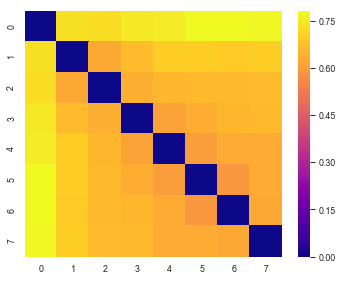

In [4]:
# create matrix for similarity between repetitions averaged within target and within game
arr_of_corrmats = h.make_adjacency_matrix(M, F, 'gameID')

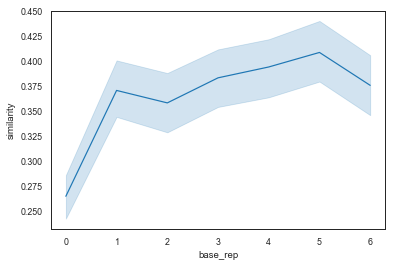

In [5]:
# plot within-pair convergence
h.plot_within_interaction_similarity(arr_of_corrmats)

##### Within-pair baseline
- For baseline, sketches are permuted across gameIDs 
- RDM, with each cell representing dissimilarity between the sketches of two repetition numbers, averaged within target and within gameID 
- Plot similarity between sketches of `base_rep` and `base_rep + 1` against `base_rep`; shows how similarity of sketches between adjacent repetitions changes with increasing repetition

/Users/megumisano/graphical_conventions/analysis/python/analysis_helpers.py:837: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  M_targ_rep['pseudo_gameID'] = list(gameIDs)


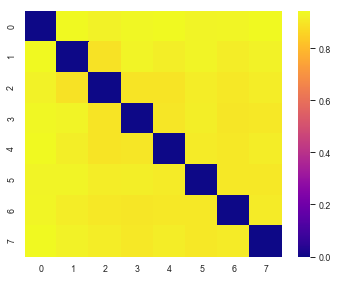

In [6]:
reload(h)
# permute across gameIDs
M_permuted_gameID = h.scramble_df_across_gameID_within_target_and_rep(M)
# create matrix for similarity between adjacent repetitions averaged within target and within game (PERMUTED)
arr_of_corrmats_permuted = h.make_adjacency_matrix(M_permuted_gameID, F, 'pseudo_gameID')

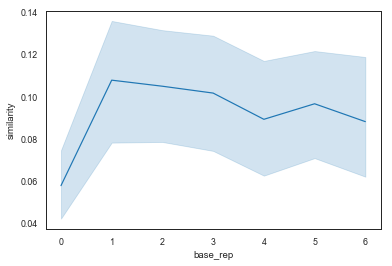

In [7]:
# plot within-pair convergence (PERMUTED)
h.plot_within_interaction_similarity(arr_of_corrmats_permuted)

##### Between-pair convergence
- Plot similarity between sketches of different gameIDs within target and within repetition 

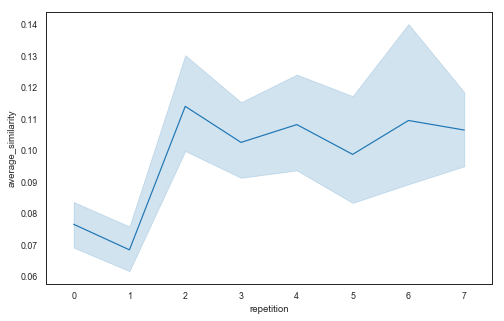

In [8]:
# plot between-pair divergence 
reload(h)
h.plot_between_interaction_similarity(M, F, 'repetition')

##### Between-pair baseline
- For baseline, sketches are permuted across repetition, but within-target and within-pair structure are preserved 

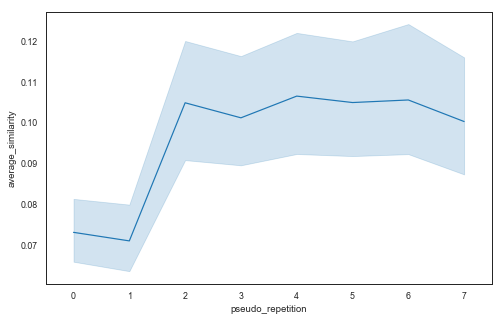

In [9]:
reload(h)
# permute across repetition 
M_permuted_rep = h.scramble_df_across_repetition_within_target_and_gameID(M)
# plot between-pair divergence (PERMUTED))
h.plot_between_interaction_similarity(M_permuted_rep, F, 'pseudo_repetition')

### 2. Within- sketch analyses 

##### First vs final stroke priority (Temporal stroke structure)
- For any pair of successive sketches, we compute baseline similarity, and see how similarity changes as we delete strokes from either the later or the earlier sketch, either in the forward or reverse direction 
- Plot similarity timecourse across stroke deletions (similarity is normalized so that baseline similarity is 1.0 and number of strokes deleted is normalized to be percentage of strokes deleted)
- Superimpose first-deleted and final-deleted to see whether it hurrts similarity more to remove from start or to remove from end 

In [9]:
D = pd.read_csv(os.path.join(results_dir, 'graphical_conventions.csv'))

In [5]:
reload(h)
# create dataframe for stroke analysis
stroke_analysis_df = h.get_stroke_analysis_df(D, M_stroke_analysis, F_stroke_analysis)

In [7]:
reload(h)
self_similarity_df = h.get_self_similarity_df(D, M_stroke_analysis, F_stroke_analysis)

In [10]:
stroke_analysis_df = pd.read_csv("csv/stroke_analysis_df.csv")
self_similarity_df = pd.read_csv("csv/self_similarity_df.csv")

In [90]:
### Computing correlation between self-similarity and length 
reload(h)
similarity_diff_list = []
length_of_strokes_deleted_list = []
for i,m in self_similarity_df.iterrows():
    similarity_diff = 1 - m['similarity']
    similarity_diff_list.append(similarity_diff)
    g = m['gameID']
    if m['target'][0] == 'w':
        t = 'waiting_' + m['target'][7:]
    else:
        t = 'dining_' + m['target'][6:]
    r = m['base_rep']
    D_ = D[(D['gameID'] == g) & (D['target'] == t) & (D['repetition'] == r)]
    svgListString = list(D_['svgString'])[0]
    arcLengths = h.getArcLengths(svgListString)
    length_of_strokes_deleted = sum([arcLengths[i] for i in range(m['num_strokes_deleted'])]) # length of first stroke 
    length_of_strokes_deleted_list.append(length_of_strokes_deleted)

In [91]:
#ratio = [x/y for x, y in zip(similarity_diff_list, length_of_strokes_deleted_list) if y != 0]
self_similarity_df['length_of_strokes_deleted'] = length_of_strokes_deleted_list
self_similarity_df['similarity_diff'] = similarity_diff_list

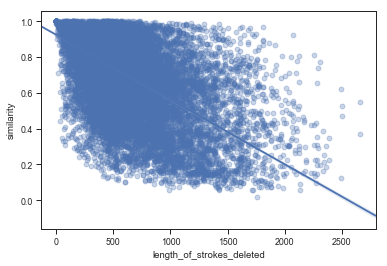

In [128]:
sns.set_context("paper")
ax = sns.regplot(x="length_of_strokes_deleted", y="similarity", scatter_kws={'alpha':0.3},#_diff
                   data=self_similarity_df)

In [119]:
from scipy import optimize
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

lm = sm.OLS.from_formula('length_of_strokes_deleted ~ similarity', self_similarity_df) #_diff
result = lm.fit()
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     length_of_strokes_deleted   R-squared:                       0.434
Model:                                   OLS   Adj. R-squared:                  0.434
Method:                        Least Squares   F-statistic:                 1.539e+04
Date:                       Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                               22:52:16   Log-Likelihood:            -1.4456e+05
No. Observations:                      20078   AIC:                         2.891e+05
Df Residuals:                          20076   BIC:                         2.891e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [113]:
## TO DO 
# delete every stroke from whole sketch and plot similarity to whole sketch against length of stroke 
reload(h)
one_deleted_df = h.get_one_deleted_df(D, M_self, F_self, M_stroke_analysis, F_stroke_analysis)

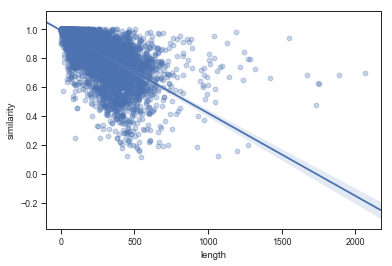

In [129]:
sns.set_context("paper")
ax = sns.regplot(x="length", y="similarity", scatter_kws={'alpha':0.3},#_diff
                   data=one_deleted_df)

In [117]:
from scipy import optimize
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

lm = sm.OLS.from_formula('length ~ similarity', one_deleted_df) #_diff
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 length   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.084e+04
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:51:50   Log-Likelihood:                -69120.
No. Observations:               11225   AIC:                         1.382e+05
Df Residuals:                   11223   BIC:                         1.383e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    934.9818      7.484    124.939      0.0

##### Plotting for each repetition pair e.g. rep0 and rep1, rep1 and rep2, etc. (continous)

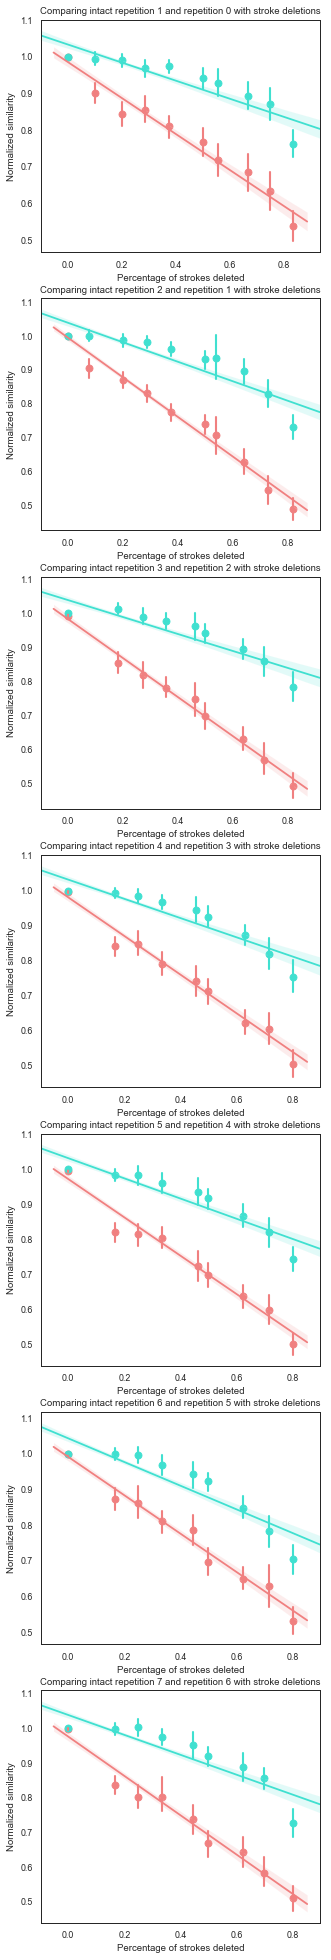

In [113]:
reload(h)
# lesion earlier sketch 
sns.set_context("paper")
fig, axs = plt.subplots(nrows=7, figsize=(5,35))
h.plot_stroke_similarity_rep_specific(stroke_analysis_df, False, axs)

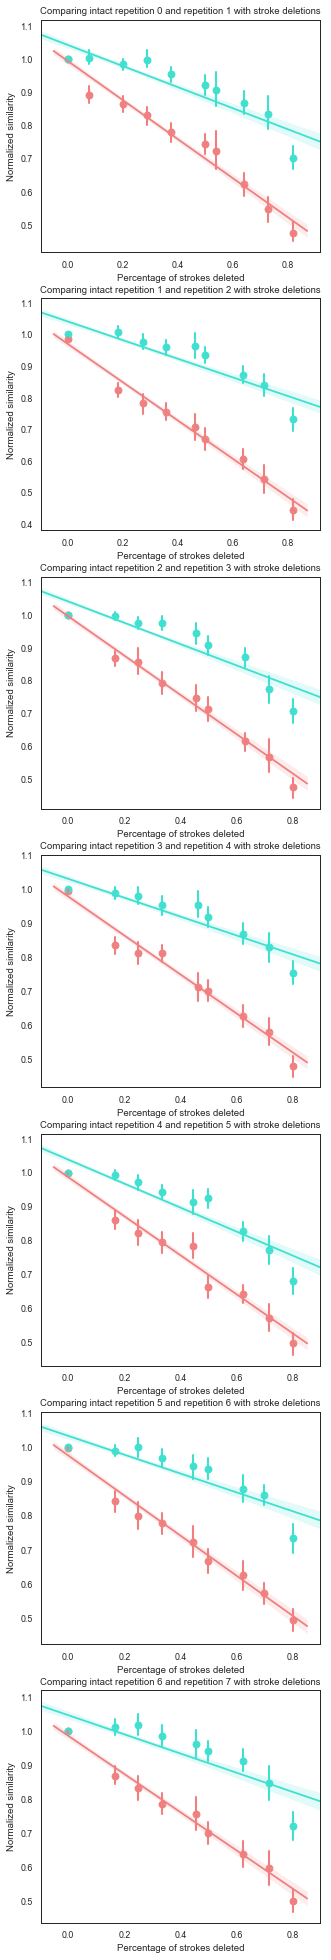

In [114]:
# lesion later sketch 
sns.set_context("paper")
fig, axs = plt.subplots(nrows=7, figsize=(5,35))
h.plot_stroke_similarity_rep_specific(stroke_analysis_df,True, axs)

In [267]:
### Self-similarity PLUS sketches
reload(h)

<module 'analysis_helpers' from '/Users/megumisano/graphical_conventions/analysis/python/analysis_helpers.py'>

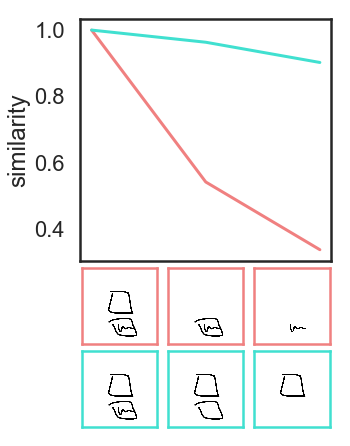

In [268]:
png_name = 'run3_0286-a442ec93-ad78-42fa-b3e9-083da9a64c4d_6_repeated_waiting_03_0_end_0.png'
h.plot_self_similarity_of(self_similarity_df, sketch_dir, png_name)

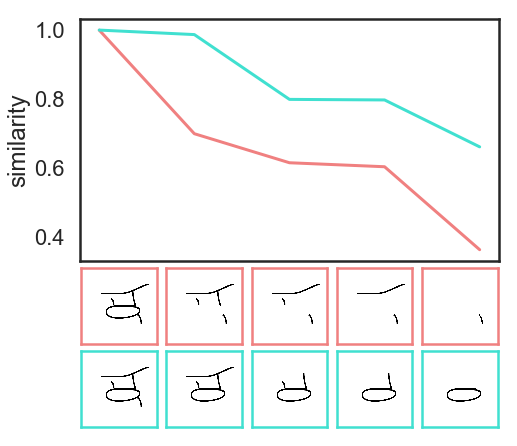

In [308]:
png_name = 'run3_0286-a442ec93-ad78-42fa-b3e9-083da9a64c4d_13_repeated_waiting_07_2_start_4.png'
h.plot_self_similarity_of(self_similarity_df, sketch_dir, png_name)

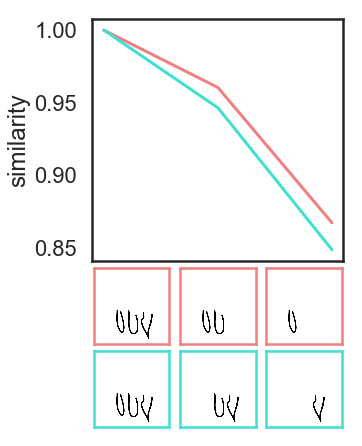

In [309]:
png_name = 'run3_0286-a442ec93-ad78-42fa-b3e9-083da9a64c4d_22_repeated_waiting_00_4_end_2.png'
h.plot_self_similarity_of(self_similarity_df, sketch_dir, png_name)

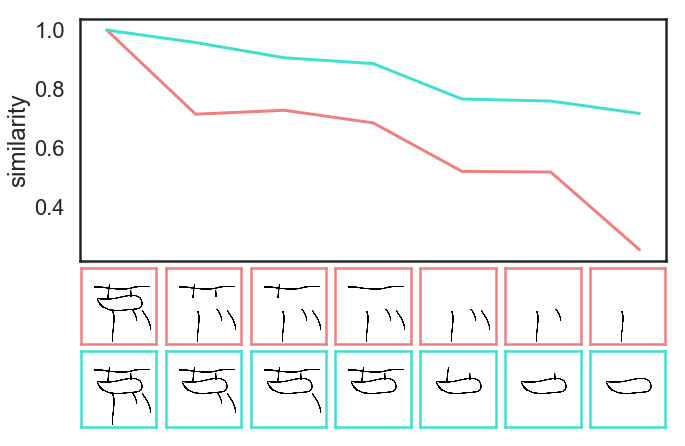

In [271]:
png_name = 'run3_0286-a442ec93-ad78-42fa-b3e9-083da9a64c4d_28_repeated_waiting_07_5_end_3.png'
h.plot_self_similarity_of(self_similarity_df, sketch_dir, png_name)

### Coloring strokes by importance

In [ ]:
png_name = 'run3_0286-a442ec93-ad78-42fa-b3e9-083da9a64c4d_28_repeated_waiting_07_5_end_3.png'
h.get_stroke_importance(self_similarity_df, sketch_dir, png_name)

### Image diagnosticity

In [10]:
# Shapenet 
shapenets = []
shapenet_30afd2ef2ed30238aa3d0a2f00b54836 = {'filename': "30afd2ef2ed30238aa3d0a2f00b54836.png" , 'basic': "dining", 'subordinate': "dining_00" , 'subset':"A", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/30afd2ef2ed30238aa3d0a2f00b54836.png"}#,width: 256, height: 256};
shapenets.append(shapenet_30afd2ef2ed30238aa3d0a2f00b54836)
shapenet_30dc9d9cfbc01e19950c1f85d919ebc2 = {'filename': "30dc9d9cfbc01e19950c1f85d919ebc2.png" , 'basic': "dining", 'subordinate': "dining_01" , 'subset':"A", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/30dc9d9cfbc01e19950c1f85d919ebc2.png"}#,width: 256, height: 256};
shapenets.append(shapenet_30dc9d9cfbc01e19950c1f85d919ebc2 )
shapenet_4c1777173111f2e380a88936375f2ef4 = {'filename': "4c1777173111f2e380a88936375f2ef4.png" , 'basic': "dining", 'subordinate': "dining_02" , 'subset':"B", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/4c1777173111f2e380a88936375f2ef4.png"}#,width: 256, height: 256};
shapenets.append(shapenet_4c1777173111f2e380a88936375f2ef4)
shapenet_3466b6ecd040e252c215f685ba622927 = {'filename': "3466b6ecd040e252c215f685ba622927.png" , 'basic': "dining", 'subordinate': "dining_03" , 'subset':"B", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/3466b6ecd040e252c215f685ba622927.png"}#,width: 256, height: 256};
shapenets.append(shapenet_3466b6ecd040e252c215f685ba622927)
shapenet_38f87e02e850d3bd1d5ccc40b510e4bd = {'filename': "38f87e02e850d3bd1d5ccc40b510e4bd.png" , 'basic': "dining", 'subordinate': "dining_04" , 'subset':"B", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/38f87e02e850d3bd1d5ccc40b510e4bd.png"}#,width: 256, height: 256};
shapenets.append(shapenet_38f87e02e850d3bd1d5ccc40b510e4bd)
shapenet_3cf6db91f872d26c222659d33fd79709 = {'filename': "3cf6db91f872d26c222659d33fd79709.png" , 'basic': "dining", 'subordinate': "dining_05" , 'subset':"B", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/3cf6db91f872d26c222659d33fd79709.png"}#,width: 256, height: 256};
shapenets.append(shapenet_3cf6db91f872d26c222659d33fd79709)
shapenet_3d7ebe5de86294b3f6bcd046624c43c9 = {'filename': "3d7ebe5de86294b3f6bcd046624c43c9.png" , 'basic': "dining", 'subordinate': "dining_06" , 'subset':"A", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/3d7ebe5de86294b3f6bcd046624c43c9.png"}#,width: 256, height: 256};
shapenets.append(shapenet_3d7ebe5de86294b3f6bcd046624c43c9)
shapenet_56262eebe592b085d319c38340319ae4 = {'filename': "56262eebe592b085d319c38340319ae4.png" , 'basic': "dining", 'subordinate': "dining_07" , 'subset':"A", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/56262eebe592b085d319c38340319ae4.png"}#,width: 256, height: 256};
shapenets.append(shapenet_56262eebe592b085d319c38340319ae4)
shapenet_1d1641362ad5a34ac3bd24f986301745 = {'filename': "1d1641362ad5a34ac3bd24f986301745.png" , 'basic': "waiting", 'subordinate': "waiting_00" , 'subset':"A", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/1d1641362ad5a34ac3bd24f986301745.png"}#,width: 256, height: 256};
shapenets.append(shapenet_1d1641362ad5a34ac3bd24f986301745)
shapenet_1da9942b2ab7082b2ba1fdc12ecb5c9e = {'filename': "1da9942b2ab7082b2ba1fdc12ecb5c9e.png" , 'basic': "waiting", 'subordinate': "waiting_01" , 'subset':"A", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/1da9942b2ab7082b2ba1fdc12ecb5c9e.png"}#,width: 256, height: 256};
shapenets.append(shapenet_1da9942b2ab7082b2ba1fdc12ecb5c9e)
shapenet_2448d9aeda5bb9b0f4b6538438a0b930 = {'filename': "2448d9aeda5bb9b0f4b6538438a0b930.png" , 'basic': "waiting", 'subordinate': "waiting_02" , 'subset':"B", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/2448d9aeda5bb9b0f4b6538438a0b930.png"}#,width: 256, height: 256};
shapenets.append(shapenet_2448d9aeda5bb9b0f4b6538438a0b930)
shapenet_23b0da45f23e5fb4f4b6538438a0b930 = {'filename': "23b0da45f23e5fb4f4b6538438a0b930.png" , 'basic': "waiting", 'subordinate': "waiting_03" , 'subset':"B", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/23b0da45f23e5fb4f4b6538438a0b930.png"}#,width: 256, height: 256};
shapenets.append(shapenet_23b0da45f23e5fb4f4b6538438a0b930)
shapenet_2b5953c986dd08f2f91663a74ccd2338 = {'filename': "2b5953c986dd08f2f91663a74ccd2338.png" , 'basic': "waiting", 'subordinate': "waiting_04" , 'subset':"B", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/2b5953c986dd08f2f91663a74ccd2338.png"}#,width: 256, height: 256};
shapenets.append(shapenet_2b5953c986dd08f2f91663a74ccd2338)
shapenet_2e291f35746e94fa62762c7262e78952 = {'filename': "2e291f35746e94fa62762c7262e78952.png" , 'basic': "waiting", 'subordinate': "waiting_05" , 'subset':"B", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/2e291f35746e94fa62762c7262e78952.png"}#,width: 256, height: 256};
shapenets.append(shapenet_2e291f35746e94fa62762c7262e78952)
shapenet_2eaab78d6e4c4f2d7b0c85d2effc7e09 = {'filename': "2eaab78d6e4c4f2d7b0c85d2effc7e09.png" , 'basic': "waiting", 'subordinate': "waiting_06" , 'subset':"A", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/2eaab78d6e4c4f2d7b0c85d2effc7e09.png"}#,width: 256, height: 256};
shapenets.append(shapenet_2eaab78d6e4c4f2d7b0c85d2effc7e09)
shapenet_309674bdec2d24d7597976c675750537 = {'filename': "309674bdec2d24d7597976c675750537.png" , 'basic': "waiting", 'subordinate': "waiting_07" , 'subset':"A", 'url': "https://s3.amazonaws.com/shapenet-graphical-conventions/309674bdec2d24d7597976c675750537.png"}#,width: 256, height: 256}
shapenets.append(shapenet_309674bdec2d24d7597976c675750537)

In [13]:
# For each image, move a 56 x 56 window and render versions with that box lesioned 

def RGBA2RGB(image, color=(255, 255, 255)):
            """Alpha composite an RGBA Image with a specified color.
            Simpler, faster version than the solutions above.
            Source: http://stackoverflow.com/a/9459208/284318
            Keyword Arguments:
            image -- PIL RGBA Image object
            color -- Tuple r, g, b (default 255, 255, 255)
            """
            image.load()  # needed for split()
            background = Image.new('RGB', image.size, (0, 0, 0))
            background.paste(image, mask=image.split()[3])  # 3 is the alpha channel
            return background
  
box_size = 56
image_dir = os.path.join(sketch_dir,'diagnosticity_{}'.format(str(box_size)))
for target_num, shapenet in enumerate(shapenets):
    image_link = shapenet['url']
    shapenet_id = shapenet['filename'].split('.')[0]
    print('rendering lesioned version of {}'.format(shapenet_id))
    target = shapenet['subordinate']
    subset = shapenet['subset']
    response = requests.get(image_link)
    im = Image.open(BytesIO(response.content))
    im = RGBA2RGB(im)
    padding = (28, 28, 28, 28)
    im = ImageOps.expand(im, padding)
    pixels = im.load()
    width, height = im.size
    for x in range(width - box_size + 1):
        for y in range(width - box_size + 1):
            new = im.copy()
            new_pixels = new.load()
            count = 0
            for i in range(width):
                for j in range(height):
                    new_pixels[i,j] = pixels[i,j]
            for k in range(box_size): # for every pixel:
                for l in range(box_size):
                    new_pixels[x + k, y + l] = (0, 0, 0)
            new.save(os.path.join(image_dir, '{}_{}_{}_lesioned_{}_{}_{}.png'.format(shapenet_id, target, subset, str(x), str(y), str(count))))
            count += 1
    #im.save(os.path.join(image_dir, '{}_{}_{}_intact_{}_{}_{}.png'.format(shapenet_id, target, subset, '0', '0', '0')))

rendering lesioned version of 30afd2ef2ed30238aa3d0a2f00b54836


KeyboardInterrupt: 

In [11]:
### compute similarity between images 
def get_lesion_image_df(D, M, F):
    d = pd.DataFrame()
    for target_shapenet in shapenets:
        target_shapenet_id = target_shapenet['filename'].split('.')[0]
        print ("similarity for {}".format(target_shapenet_id))
        M_target = M[M['shapenet'] == target_shapenet_id]
        M_lesioned = M_target[M_target['isLesioned'] == True]
        for i,m in M_lesioned.iterrows():
            feature_ind_of_lesioned_sketch = m['feature_ind']
            x = m['x']
            y = m['y']
            for distractor_shapenet in shapenets:
                distractor_shapenet_id = distractor_shapenet['filename'].split('.')[0]
                M_distractor = M[M['shapenet'] == distractor_shapenet_id]
                #M_intact = M[M['target'] == intact_num]
                feature_ind_of_intact_image = list(M_distractor[M_distractor['isLesioned'] == True]['feature_ind'])[0] # changed from False 
                similarity = compute_similarity(F, [feature_ind_of_intact_image, feature_ind_of_lesioned_sketch])
                df_to_add = pd.DataFrame([[target_shapenet_id, distractor_shapenet_id, x, y, similarity]], columns=['lesioned_target', 'intact_target', 'x', 'y', 'similarity'])
                d = d.append(df_to_add)         
    for target_shapenet in shapenets:
        target_shapenet_id = target_shapenet['filename'].split('.')[0]
        M_target = M[M['shapenet'] == target_shapenet_id]
        M_non_lesioned = M_target[M_target['isLesioned'] == False]
        feature_ind_of_non_lesioned_image = list(M_non_lesioned[M_non_lesioned['isLesioned'] == False]['feature_ind'])[0]
        for distrator_shapenet in shapenets:
            distractor_shapenet_id = distractor_shapenet['filename'].split('.')[0]
            M_distractor = M[M['shapenet'] == distractor_shapenet_id]
            feature_ind_of_intact_image = list(M_distractor[M_distractor['isLesioned'] == False]['feature_ind'])[0]
            similarity = compute_similarity(F, [feature_ind_of_intact_image, feature_ind_of_non_lesioned_image])
            df_to_add = pd.DataFrame([[target_shapenet_id, distractor_shapenet_id, float('nan'), float('nan'), similarity]], columns=['lesioned_target', 'intact_target', 'x', 'y', 'similarity'])
            d = d.append(df_to_add)         
    return d

In [ ]:
lesion_image_df = pd.read_csv("csv/lesion_image_df.csv")
#lesion_image_df = lesion_image_df.drop(['Unnamed: 0'], axis=1)
# path_to_feats_diagnosticity = base_path + 'diagnosticity/FEATURES_FC6_images--spatial_avg=True_no-channel-norm.npy'
# path_to_meta_diagnosticity = base_path + 'diagnosticity/METADATA_images--spatial_avg=True.csv'
# F_diagnosticity = np.load(path_to_feats_diagnosticity)
# M_diagnosticity = clean_up_metadata(pd.read_csv(path_to_meta_diagnosticity))
#diagnosticity_df = get_lesion_image_df(D, M_diagnosticity, F_diagnosticity)
diagnosticity_df = pd.read_csv("csv/diagnosticity_df.csv")

In [135]:
reload(h)
shapenet_ids = list(diagnosticity_df['lesioned_target'].unique())
composite_heatmaps_, numerator_heatmaps_, denominator_heatmaps_ = h.get_pixel_importance_heatmaps(D, shapenet_ids)

In [222]:
# sanity check 
counts = np.zeros((224, 224))
for i in range(224 - 56 + 1): # i is the x coordinate 
    for j in range(224 - 56 + 1):
        for x in range(56):
            for y in range(56):
                counts[j + y, i + x] += 1.0

In [16]:
reload(h)
diag_df = pd.read_csv('diagnosticity_df.csv')
shapenet_ids = list(diag_df['lesioned_target'].unique())[:4]
composite_heatmaps_, numerator_heatmaps_, denominator_heatmaps_ = h.get_pixel_importance_heatmaps(diag_df, shapenet_ids)
# normalize denominator heatmaps 
for i in range(4):
    hmap = denominator_heatmaps_[i] 
# compute composite 
composite_heatmaps_ = [np.divide(numerator_heatmaps_[p], denominator_heatmaps_[p]) for p in range(4)]

getting map for 30afd2ef2ed30238aa3d0a2f00b54836
getting map for 30dc9d9cfbc01e19950c1f85d919ebc2
getting map for 4c1777173111f2e380a88936375f2ef4
getting map for 3466b6ecd040e252c215f685ba622927


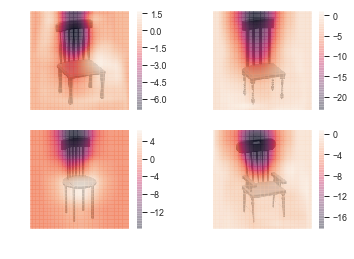

In [41]:
sns.set_context('paper')
fig, axes = plt.subplots(nrows=2, ncols=2)
image_links = [shapenet['url'] for shapenet in shapenets if shapenet['filename'].split('.')[0] in shapenet_ids]
for target_num in range(4):
    response = requests.get(image_links[target_num])
    im = Image.open(BytesIO(response.content))
    x = 0 if target_num == 0 or target_num == 1 else 1
    y = 0 if target_num == 0 or target_num == 2 else 1
    ax = axes[x, y]
    heatmap = denominator_heatmaps_[target_num]
    min_val = np.min(heatmap)
    max_val = np.max(heatmap) 
    hmax = sns.heatmap(heatmap, ax=ax, alpha = 0.12, vmin=min_val, vmax=max_val)
    ax.imshow(im)#plt.imshow(im, zorder=0, extent=[0.5, 8.0, 1.0, 7.0], ax=ax)
    ax.axis('off')
plt.show()

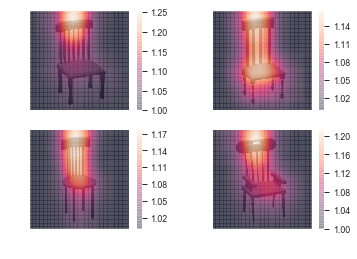

In [37]:
sns.set_context('paper')
fig, axes = plt.subplots(nrows=2, ncols=2)
image_links = [shapenet['url'] for shapenet in shapenets if shapenet['filename'].split('.')[0] in shapenet_ids]
for target_num in range(4):
    response = requests.get(image_links[target_num])
    im = Image.open(BytesIO(response.content))
    x = 0 if target_num == 0 or target_num == 1 else 1
    y = 0 if target_num == 0 or target_num == 2 else 1
    ax = axes[x, y]
    heatmap = 1 / numerator_heatmaps_[target_num]
    min_val = np.min(heatmap)
    max_val = np.max(heatmap) 
    hmax = sns.heatmap(heatmap, ax=ax, alpha = 0.12, vmin=min_val, vmax=max_val)
    ax.imshow(im)#plt.imshow(im, zorder=0, extent=[0.5, 8.0, 1.0, 7.0], ax=ax)
    ax.axis('off')
plt.show()

In [ ]:
sns.set_context('paper')
fig, axes = plt.subplots(nrows=2, ncols=2)
image_links = [shapenet['url'] for shapenet in shapenets if shapenet['filename'].split('.')[0] in shapenet_ids]
for target_num in range(4):
    response = requests.get(image_links[target_num])
    im = Image.open(BytesIO(response.content))
    x = 0 if target_num == 0 or target_num == 1 else 1
    y = 0 if target_num == 0 or target_num == 2 else 1
    ax = axes[x, y]
    heatmap = composite_heatmaps_[target_num]
    min_val = np.min(heatmap)
    max_val = np.max(heatmap)
    hmax = sns.heatmap(heatmap, ax=ax, alpha = 0.12, vmin=min_val, vmax=max_val)
    ax.imshow(im)#plt.imshow(im, zorder=0, extent=[0.5, 8.0, 1.0, 7.0], ax=ax)
    ax.axis('off')
plt.show()

### Self-Similarity

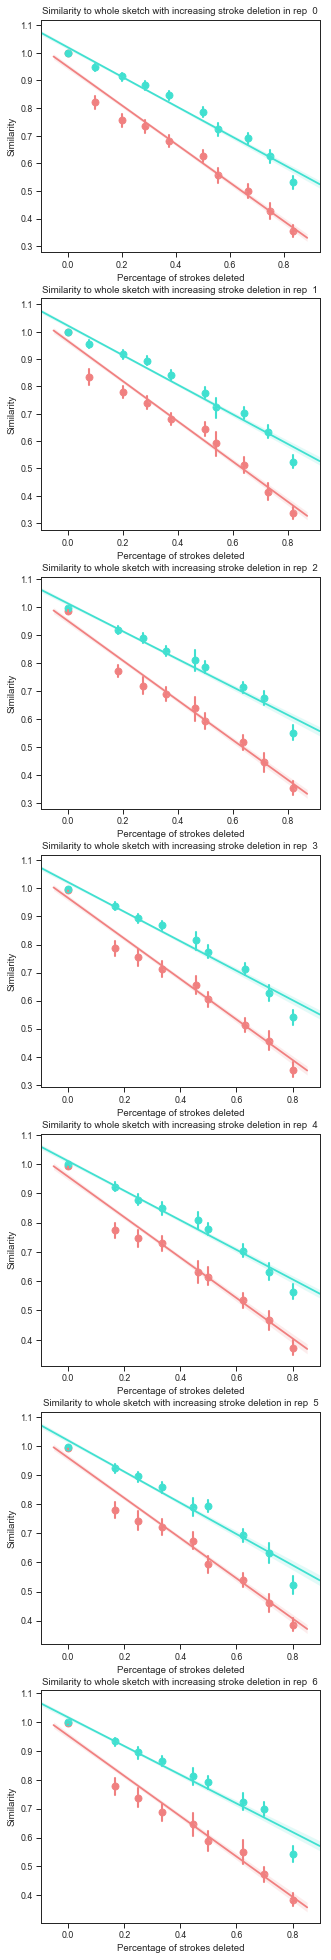

In [130]:
### Self-similarity aggregated 
fig, axs = plt.subplots(nrows=7, figsize=(5,35))
reload(h)
h.plot_self_similarity(self_similarity_df, axs)

##### Aggregating across repetition pairs (continuous)

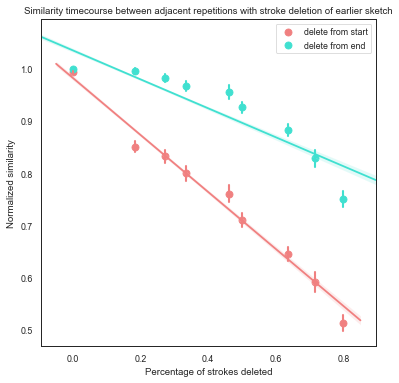

In [33]:
# lesion earlier sketch 
reload(h)
sns.set_context("paper")
fig, ax = plt.subplots(figsize=(6, 6))
h.plot_stroke_similarity_rep_aggregate(stroke_analysis_df, False, ax)

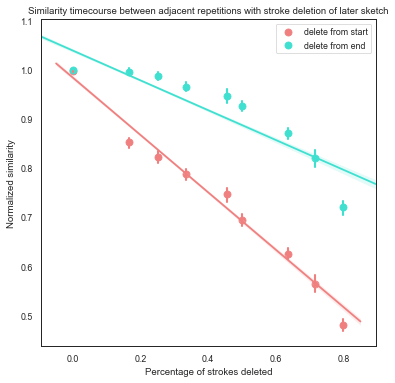

In [148]:
# lesion later sketch 
reload(h)
sns.set_context("paper")
fig, ax = plt.subplots(figsize=(6, 6))
h.plot_stroke_similarity_rep_aggregate(stroke_analysis_df, True, ax)

##### With facets corresponding to total number of strokes in sketch (discrete)

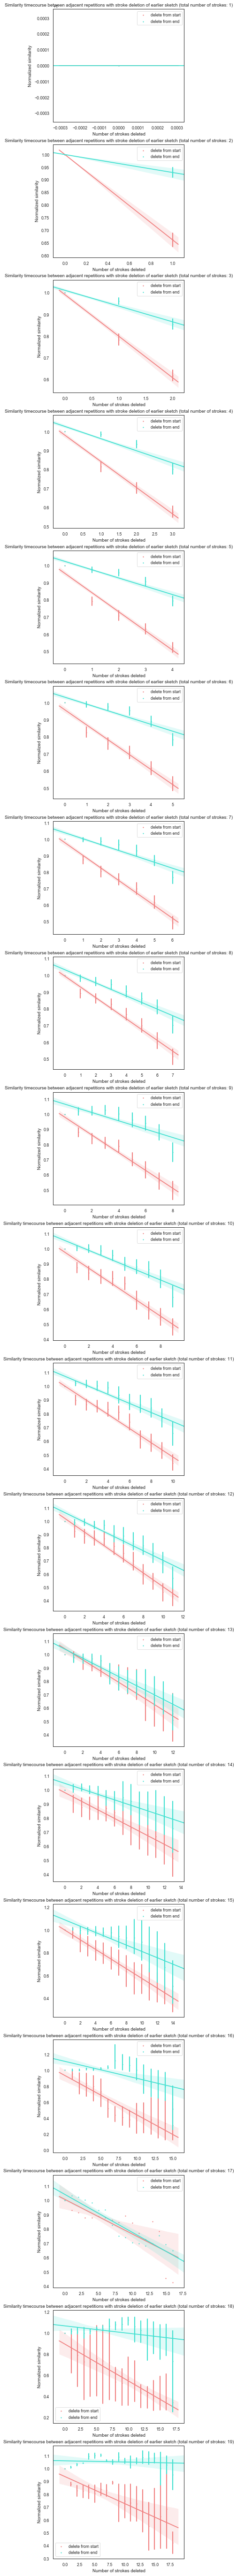

In [16]:
reload(h)
sns.set_context("paper")
h.plot_stroke_similarity_discrete(stroke_analysis_df, False)

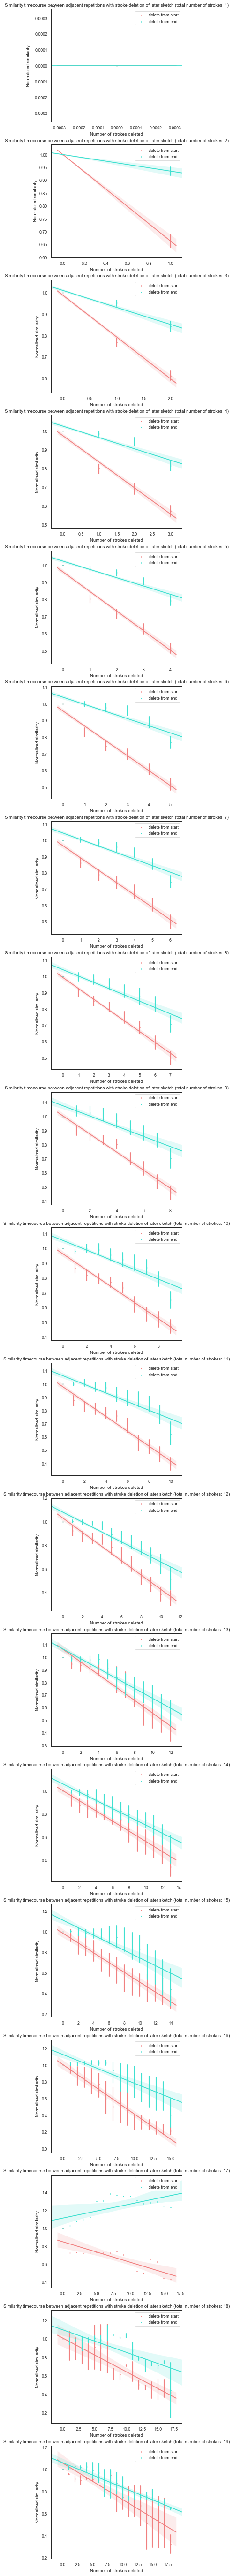

In [110]:
sns.set_context("paper")
h.plot_stroke_similarity_discrete(stroke_analysis_df, True)

#### exploratory analysis

In [196]:
# to do 
import PIL.Image
# first, find out median arclength of each trial of each game 
# then subset M_stroke_analysis such that there are only two rows per sketch (actually 4)
# to this new dataframe add another column that indicates first half or second half (according to arclength)
# try to do it with 70% ones only and then 30% only
def getArcLengths(svgListString):
    return [arcl(ast.literal_eval(svgListString)[i]) for i in range(len(ast.literal_eval(svgListString)))]

half_list = [None] * len(M_stroke_analysis)
M_stroke_analysis['half'] = half_list
M_stroke_analysis['exclude'] = half_list

for i,m in M_stroke_analysis.iterrows():
    g = m['gameID']
    t = m['trial_num']
    D_ = D[(D['gameID'] == g) & (D['trialNum'] == t)]
    svgListString = list(D_['svgString'])[0]
    arcLengths = getArcLengths(svgListString)
    totalArcLength = sum(arcLengths)
    halfArcLength = totalArcLength / 2.0 
    if arcLengths[0] > halfArcLength:
        M_stroke_analysis.ix[i, 'exclude'] = True 
        m['exclude'] = True
        if m['num_strokes_deleted'] == 1 and m['direction'] == 'start':
            M_stroke_analysis.ix[i, 'half'] = 'second'
        if m['num_strokes_deleted'] == len(ast.literal_eval(svgListString)) - 1 and m['direction'] == 'end':
            M_stroke_analysis.ix[i, 'half'] = 'first' 
        if m['num_strokes_deleted'] == 0 and m['direction'] == 'start':
            M_stroke_analysis.ix[i, 'half'] = 'full' 
    else:
        M_stroke_analysis.ix[i, 'exclude'] = False
        min_diff = float('inf')
        for j in range(len(arcLengths)):
            diff =abs(sum(arcLengths[:j+1]) - halfArcLength)
            if diff < min_diff:
                min_diff = diff
                strokes_in_first = j + 1
        if m['num_strokes_deleted'] == strokes_in_first and m['direction'] == 'start':
            M_stroke_analysis.ix[i, 'half'] = 'second'
        if m['num_strokes_deleted'] == len(ast.literal_eval(svgListString)) - strokes_in_first and m['direction'] == 'end':
            M_stroke_analysis.ix[i, 'half'] = 'first'
        if m['num_strokes_deleted'] == 0 and m['direction'] == 'start':
            M_stroke_analysis.ix[i, 'half'] = 'full' 

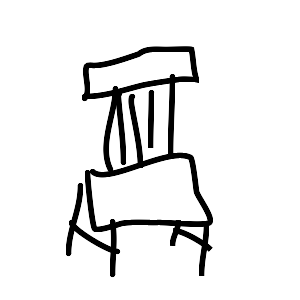

In [23]:
pngs_dir = os.path.join(sketch_dir, 'stroke_analysis/png')
trialNum = 12 
rep = 1 
direction = 'start'
num_strokes_deleted = 0
to_open = 'run3_0724-1a59371c-6fe6-4d6d-a987-db533e75a5e5_' + str(trialNum) + '_repeated_dining_04_' + str(rep) + '_' + str(direction) + '_' + str(num_strokes_deleted) + '.png'
image = PIL.Image.open(os.path.join(pngs_dir, to_open))
display(image) #image.show()

In [34]:
M_qual = M_qual[(M_qual['trial_num'] != 12) & (M_qual['trial_num'] != 1)]

In [44]:
reload(h)
_qd = pd.DataFrame()
for g in M_qual['gameID'].unique():
    M_ = M_qual[M_qual['gameID'] == g]
    for l in M_['repetition'].unique():
        # l is the one we are lesioning 
        # i is the intact one 
        subtracted = [item for item in M_['repetition'].unique() if item != l]
        assert len(subtracted) == 1
        i = subtracted[0]
        intact_ind = M_[(M_['repetition'] == i) & (M_['num_strokes_deleted'] == 0)]['feature_ind'][0]
        m = M_[(M_['repetition'] == l)]
        total_num_strokes = len(m) 
        for stroke_num in range(total_num_strokes):
            lesion_ind = M_[(M_['repetition'] == l) & (M_['num_strokes_deleted'] == stroke_num)]['feature_ind'][0]
            similarity = compute_similarity(F_qual, [lesion_ind, intact_ind])
            df_to_add = pd.DataFrame([[g, l, i, stroke_num, total_num_strokes, similarity]], columns=['gameID', 'lesioned_rep', 'intact_rep', 'deleted_stroke_number', 'total_num_strokes', 'similarity'])
            _qd = _qd.append(df_to_add)

In [28]:
qd.to_csv('qualitative_stroke_analysis.csv')

In [40]:
qd_.to_csv('qualitative_stroke_analysis_2.csv')

In [45]:
_qd.to_csv('qualitative_stroke_analysis_2.csv')

In [ ]:
def plot_stroke_similarity_rep_aggregate(d, lesion_later_sketch, ax):
    for direction in ['start', 'end']:
        d_ = d[(d['direction'] == direction) & (d['lesion_later_sketch'] == lesion_later_sketch)]
        color = 'lightcoral' if direction == 'start' else 'turquoise'
        label = 'delete from start' if direction == 'start' else 'delete from end'
        a = sns.regplot(x="percentage_strokes_deleted", y='similarity', data=d_, x_bins=10, ax=ax, color=color, label=label)
        later_or_earlier = "later" if lesion_later_sketch else "earlier"
        a.set_title('Similarity timecourse between adjacent repetitions with stroke deletion of {} sketch'.format(later_or_earlier))
        a.set_ylabel('Normalized similarity')
        a.set_xlabel('Percentage of strokes deleted')
        a.legend()

In [333]:
# M = M_half_valid

# sns.set_context("paper")
# fig, axs = plt.subplots(nrows=7, figsize=(5,35))
# #half_sketch_lesions_df = get_half_sketch_lesion_df(M_half_valid, F_stroke_analysis, axs)
F = F_stroke_analysis
M = M_half_invalid#M_stroke_analysis
# def get_half_sketch_lesion_df(M, F, axs):
d_invalid = pd.DataFrame()
for base_rep in range(7):
    next_rep = base_rep + 1 
    ax = axs[base_rep]
    for lesion_later_sketch in [True, False]:
        if lesion_later_sketch:
            deleted_rep = next_rep
            intact_rep = base_rep 
        else:
            deleted_rep = base_rep 
            intact_rep = next_rep 
        for direction in ['start', 'end']:
            for g in M['gameID'].unique():
                for t in M[(M['gameID'] == g) & (M['condition'] == 'repeated')]['target'].unique():
                    #if len(M_[(M['gameID'] == g) & (M['target'] == t) & (M['repetition'] == intact_rep) & (M['half'] == 'full')]) > 0:
                    try:
                        feature_ind_of_intact_sketch = M[(M['gameID'] == g) & (M['target'] == t) & (M['repetition'] == intact_rep) & (M['half'] == 'full')]['feature_ind'][0]
                    except:
                        print("oops")
                        continue  
                    for i in ['not_lesioned', 'lesioned']:
                        if (direction == 'start' and i == 'lesioned'):
                            half = 'second'
                        if (direction == 'end' and i == 'lesioned'):
                            half = 'first'
                        if (i == 'not_lesioned'):
                            half = 'full'
                        if len(M[(M['gameID'] == g) & (M['target'] == t) & (M['condition'] == 'repeated') & (M['repetition'] == next_rep) & (M['half'] == half)]) > 0:
                            feature_ind_of_deleted_sketch = M[(M['gameID'] == g) & (M['target'] == t) & (M['condition'] == 'repeated') & (M['repetition'] == next_rep) & (M['half'] == half)]['feature_ind'][0]
                        else:
                            continue
                        similarity = compute_similarity(F, [feature_ind_of_intact_sketch, feature_ind_of_deleted_sketch])
                        if i == 'not_lesioned':
                            baseline_similarity = similarity
                        normalized_similarity = float(similarity) / float(baseline_similarity)
                        lesioned = True if i == 'lesioned' else False
                        df_to_add = pd.DataFrame([[g, t, lesioned, normalized_similarity, base_rep, direction, lesion_later_sketch]], columns=['gameID', 'target', 'lesioned', 'similarity', 'base_rep', 'direction', 'lesion_later_sketch'])
                        d_invalid = d_invalid.append(df_to_add)
#     return d
#     for direction in ['start', 'end']:
#         d_ = d[(d['direction'] == direction) & (d['lesion_later_sketch'] == lesion_later_sketch)]
#         color = 'lightcoral' if direction == 'start' else 'turquoise'
#         label = 'delete from start' if direction == 'start' else 'delete from end'
#         a = sns.regplot(x="percentage_strokes_deleted", y='similarity', data=d_, x_bins=10, ax=ax, color=color, label=label)
#         later_or_earlier = "later" if lesion_later_sketch else "earlier"
#         a.set_title('Similarity timecourse between adjacent repetitions with stroke deletion of {} sketch'.format(later_or_earlier))
#         a.set_ylabel('Normalized similarity')
#         a.set_xlabel('Percentage of strokes deleted')
#         a.legend()

oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops


oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops
oops


In [325]:
# combinations: lesion later sketch true false
def plot_half_lesion(d, lesion_later_sketch, ax):
    for direction in ['start', 'end']:
        d_ = d[(d['direction'] == direction) & (d['lesion_later_sketch'] == lesion_later_sketch)]
        color = 'lightcoral' if direction == 'start' else 'turquoise'
        label = 'delete first' if direction == 'start' else 'delete second'
        a = sns.regplot(x="lesioned", y='similarity', data=d_, x_bins=10, ax=ax, color=color, label=label)
        later_or_earlier = "later" if lesion_later_sketch else "earlier"
        a.set_title('Similarity between adjacent reps lesionin {} sketch'.format(later_or_earlier))
        a.set_ylabel('Normalized similarity')
#         a.set_xlabel('Percentage of strokes deleted')
        a.legend()
    
# combinations: lesion later sketch true false
def plot_half_lesion_rep(d, lesion_later_sketch, axs):
    for base_rep in range(7):
        next_rep = base_rep + 1
        ax=axs[base_rep]
        for direction in ['start', 'end']:
            d_ = d[(d['direction'] == direction) & (d['base_rep'] == base_rep) & (d['lesion_later_sketch'] == lesion_later_sketch)]
            color = 'lightcoral' if direction == 'start' else 'turquoise'
            intact = base_rep if lesion_later_sketch else next_rep
            lesioned = next_rep if lesion_later_sketch else base_rep
            label = 'delete first' if direction == 'start' else 'delete second'
            a = sns.regplot(x="lesioned", y='similarity', data=d_, x_bins=10, ax=ax, color=color, label=label)
            later_or_earlier = "later" if lesion_later_sketch else "earlier"
            a.set_title('intact: {} and lesioned: {}'.format(intact, lesioned))
            a.set_ylabel('Normalized similarity')
    #         a.set_xlabel('Percentage of strokes deleted')
            a.legend()

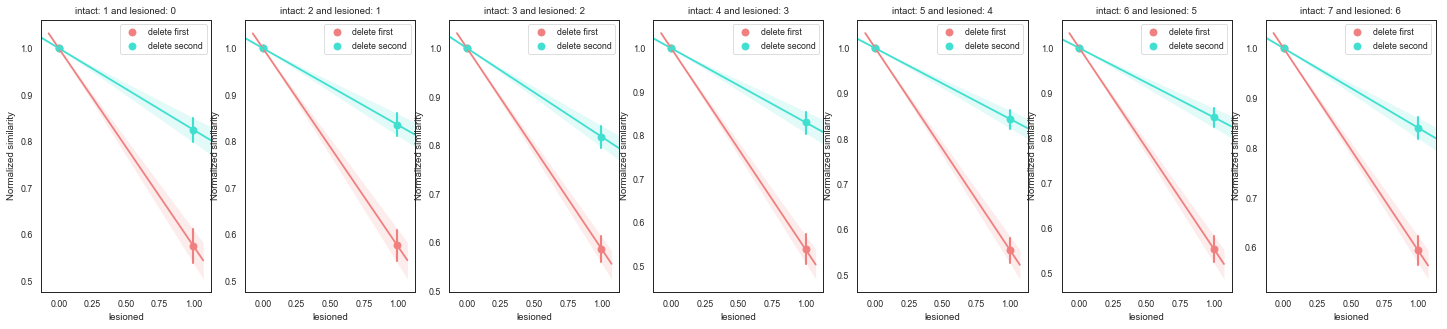

In [335]:
### invalid 30% version 
reload(h)
sns.set_context("paper")
fig, axs = plt.subplots(ncols=7, figsize=(25,5))
plot_half_lesion_rep(d_invalid, False, axs)

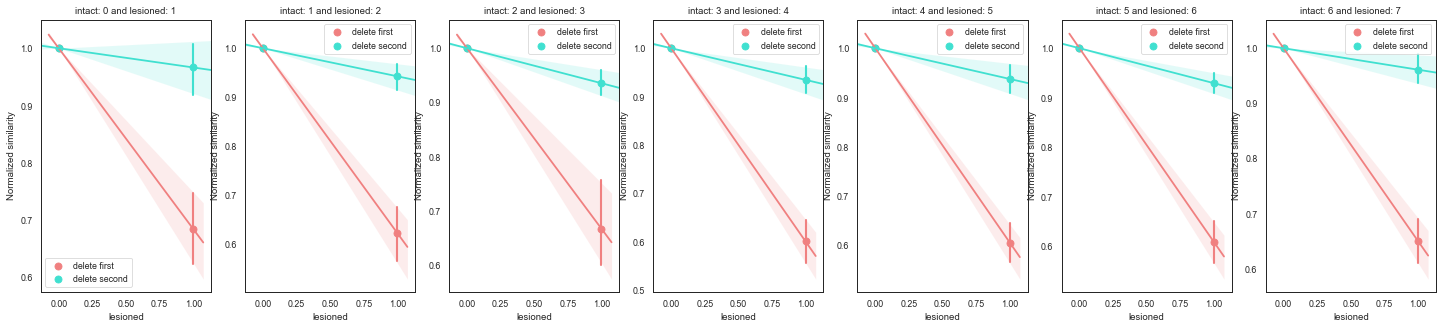

In [336]:
reload(h)
sns.set_context("paper")
fig, axs = plt.subplots(ncols=7, figsize=(25,5))
plot_half_lesion_rep(d_invalid, True, axs)

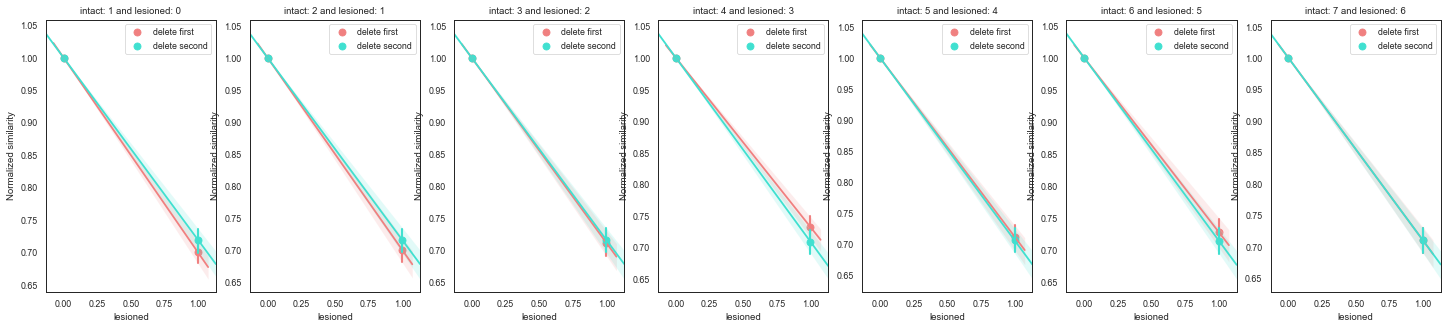

In [309]:
reload(h)
sns.set_context("paper")
fig, axs = plt.subplots(ncols=7, figsize=(25,5))
plot_half_lesion_rep(d, False, axs)

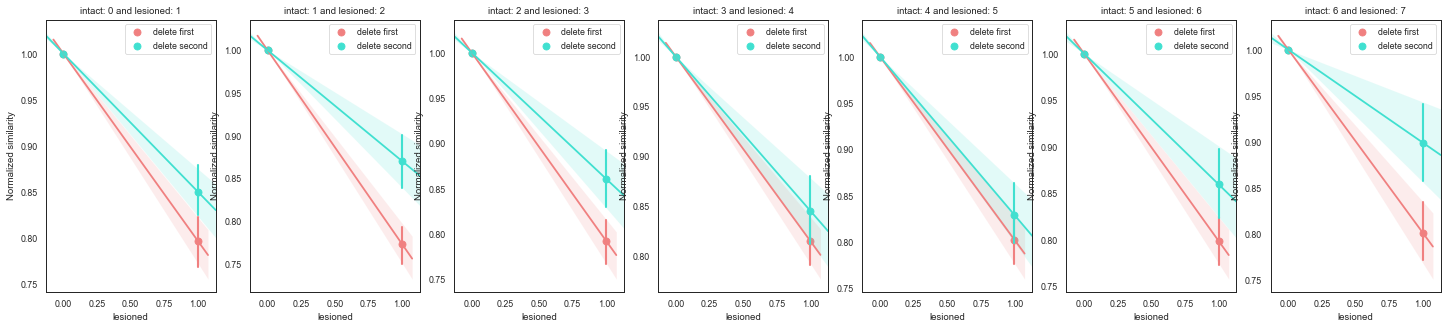

In [310]:
reload(h)
sns.set_context("paper")
fig, axs = plt.subplots(ncols=7, figsize=(25,5))
plot_half_lesion_rep(d, True, axs)

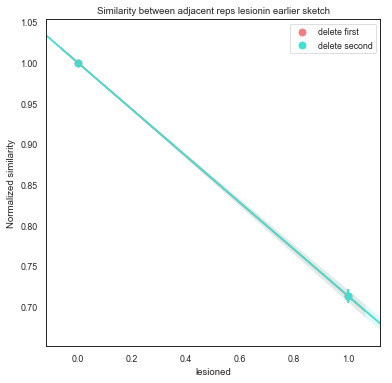

In [311]:
reload(h)
sns.set_context("paper")
fig, ax = plt.subplots(figsize=(6, 6))
plot_half_lesion(d, False, ax)

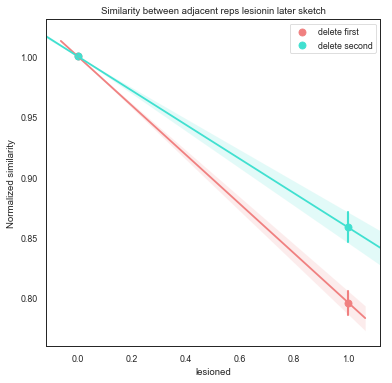

In [312]:
reload(h)
sns.set_context("paper")
fig, ax = plt.subplots(figsize=(6, 6))
plot_half_lesion(d, True, ax)

In [180]:
count = 0 
difflist = []
total_arc_length_list = []
p = pd.DataFrame()
percentage_list = [] 
for i,d in D.iterrows():
    # what is the total arc length 
    arcLengths = getArcLengths(d['svgString'])
    totalArcLength = sum(arcLengths)
    total_arc_length_list.append(totalArcLength)
    if arcLengths[0] > totalArcLength / 2.0:
        diff = arcLengths[0] - totalArcLength / 2.0 
        difflist.append(diff)
    percentage = float(arcLengths[0]) / float(totalArcLength)
    percentage_list.append(percentage)
        
p['percentage'] = percentage_list

Text(0.5,0,'proportion of the first stroke in the sketch in terms of stroke length')

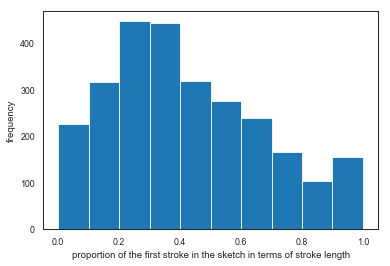

In [340]:
data = np.array(percentage_list)
plt.hist(data) 
plt.ylabel("frequency")
plt.xlabel("proportion of the first stroke in the sketch in terms of stroke length")

In [ ]:
### examining stroke length distribution 

In [141]:
from svgpathtools import parse_path
import svgpathtools
import math
import ast 

def arcl(svg):
    return parse_path(svg).length()

In [142]:
stroke_length_d = pd.DataFrame()
for i,d in D.iterrows():
    for stroke_num, path in enumerate(ast.literal_eval(d['svgString'])):
        length = math.log(arcl(path))
        df_to_add = pd.DataFrame([[stroke_num, length]], columns=['stroke_num', 'length'])
        stroke_length_d = stroke_length_d.append(df_to_add)    

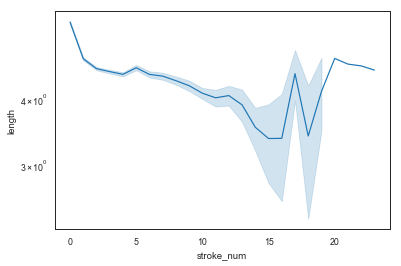

In [144]:
g = sns.lineplot(x="stroke_num", y="length", data=stroke_length_d)
g.set_yscale('log')
# g.set_yscale('log')

##### Fine-grained properties of individual sketches 

In [21]:
### sensitivity analysis (i.e. heat map tracing)

In [22]:
### similarity of part-level features across reps 

In [3]:
png_paths = os.listdir(os.path.join(sketch_dir, 'stroke_analysis/png'))

In [11]:
for path_ in png_paths[1:]:
    path = path_.split('.')[0]
    gameID = path.split('_')[0]
    trialNum = path.split('_')[1]
    target = path.split('_')[2] + '_' + path.split('_')[3] 
    repetition = path.split('_')[4]
    run_num = path.split('_')[5]
    if run_num == 'run4':
        num_strokes_deleted = path.split('_')[7]
        direction = path.split('_')[8]
    else:
        num_strokes_deleted = path.split('_')[8]
        direction = path.split('_')[9]
    condition = list(D[(D['gameID'] == gameID) & (D['trialNum'] == int(trialNum))]['condition'])[0]
    new_path_ = run_num + '_' + gameID + '_' + trialNum + '_' + condition + '_' + target + '_' + repetition + '_' + direction + '_' + num_strokes_deleted + '.png' 
    old_path = os.path.join(os.path.join(sketch_dir, 'stroke_analysis/png'), path_)
    new_path = os.path.join(os.path.join(sketch_dir, 'stroke_analysis/png'), new_path_)
    command = "mv {} {}".format(old_path, new_path)
    os.system(command)

## supplementary analyses

In [68]:
# plotting 8 RDMs, one for each repetition 
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(40,20))
for rep in range(8): 
    x_ind = rep % 4
    y_ind = 0 if rep < 4 else 1 
    M_rep = M[M['repetition'] == str(int(rep))]
    M_rep_sorted = M_rep.sort_values(by=['target'])
    sorted_feature_ind = list(M_rep_sorted['feature_ind'])
    get_and_plot_RDM(M_rep, F, sorted_feature_ind, axs, x_ind, y_ind, rep)

saving sketches from game: 7053-d1f771d6-a55b-4681-961f-5a9ebb43cbdb
saving sketches from game: 3558-8fa206a2-9b8c-4d67-a4ab-0832dc0d0f25
saving sketches from game: 6964-d6de9966-f3dd-45df-8d24-d5bfd5d46eb8
saving sketches from game: 4853-a05bfdd7-095c-4b93-bdde-2b99fd29c7a2
saving sketches from game: 5616-7114c020-0e81-482c-952b-b26fc66076a0
saving sketches from game: 9817-6f2a66db-fc24-482d-aa20-1980ad6f524e
saving sketches from game: 7527-5ab8c64c-3f95-4864-bb6a-f9cad4b0d34e
saving sketches from game: 1820-86afdf51-4b4c-43a9-a9e1-e6e20618de1b
saving sketches from game: 7438-c77fa69e-d41c-41a4-b530-fc2809c07323
saving sketches from game: 9075-d6c9b0a6-bfb2-4148-ae19-d0da518aef97
saving sketches from game: 7637-26870e81-faae-4521-a2e9-10424526a22c
saving sketches from game: 4395-6cdb78e3-0c3f-4526-9670-8e4c1dcbc542
saving sketches from game: 3480-03933bf3-5e7e-4ecd-b151-7ae57e6ae826
saving sketches from game: 7360-1ccf92da-d46d-4315-8c81-6620388ee62f
saving sketches from game: 8103-96

##### path-dependence

In [ ]:
def get_corr_coefs(M,F):
    auto_corr_df = pd.DataFrame()
    for g in list(M['gameID'].unique()):
        for t in list(M[M['gameID'] == g]['target'].unique()):
            mini_df = M[(M['gameID'] == g) & (M['target'] == t)] 
            #mini_df = M[(M['gameID'] == '0050-769c4742-aefc-4bea-aeb2-7dc48b51fe82') & (M['target'] == 'dining_05')] 
            for base_rep in mini_df['repetition'].unique():
                base_ind = list(mini_df[mini_df['repetition'] == base_rep]['feature_ind'])[0]
                for other_rep in mini_df['repetition'].unique():
                    if base_rep < other_rep:# check if other_rep is bigger - only compare forward 
                        rep_dist = other_rep - base_rep
                        other_ind = list(mini_df[mini_df['repetition'] == other_rep]['feature_ind'])[0]
                        features_to_compare = F[[base_ind, other_ind], :]
                        corr_coef = np.corrcoef(features_to_compare)[1][0]
                        df_to_add = pd.DataFrame([[g, t, base_rep,  rep_dist, corr_coef]], columns=['gameID', 'target', 'base_rep', 'rep_dist', 'corr_coef'])
                        auto_corr_df = auto_corr_df.append(df_to_add)
    return auto_corr_df

auto_corr_df = get_corr_coefs(M, F)

In [ ]:
# how does the similarity between sketches of adjacent repetitions change with increasing base repetition number? 
sns.regplot(
    data=auto_corr_df,
    x_estimator=np.mean,
    x='base_rep',
    y='corr_coef',
    logx=True)

In [ ]:
# how does the similarity between sketches of adjacent repetitions change with increasing repetition distance? 
sns.regplot(
    data=auto_corr_df,
    x_estimator=np.mean,
    x='rep_dist',
    y='corr_coef')

In [ ]:
new_df_ = pd.DataFrame()
for rep in auto_corr_df['base_rep'].unique():
    df_ = auto_corr_df[auto_corr_df['base_rep'] == rep]
    for dist in df_['rep_dist'].unique():
        _df = df_[df_['rep_dist'] == dist]
        mean = np.mean(np.array(_df['corr_coef']))
        df_to_add = pd.DataFrame([[rep, dist, mean]], columns=['base_rep', 'rep_dist', 'mean_corr_coef'])
        new_df_ = new_df_.append(df_to_add)

In [ ]:
g = sns.FacetGrid(data=new_df_, col="rep_dist", height=3, aspect=1, col_wrap=4, margin_titles=True)
g = g.map(plt.scatter, "base_rep", "mean_corr_coef")
# g = sns.catplot(x="base_rep", y="mean_corr_coef",
#                 col="rep_dist", data=new_df_,col_wrap=2)

##### classifier approach

In [ ]:
#sklearn
from sklearn import decomposition, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics  import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# make dataframe with just the first repetition 
M_0 = M[M['repetition'] == 0]
y = list(M_0['target'])
feature_inds = list(M_0['feature_ind'])
features = F[feature_inds, :]
x = pd.DataFrame(features)

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(x, y, test_size = 0.2)

# make dataframe with just the last repetition 
M_7 = M[M['repetition'] == 7]
y = list(M_7['target'])
feature_inds = list(M_7['feature_ind'])
features = F[feature_inds, :]
x = pd.DataFrame(features)

X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(x, y, test_size = 0.2)

In [ ]:
# makes training and testing sets for sketches from specific repetition 
def make_sets(M, rep):
    # make dataframe with just the last repetition 
    M_= M[M['repetition'] == rep]
    y = list(M_['target'])
    feature_inds = list(M_['feature_ind'])
    features = F[feature_inds, :]
    x = pd.DataFrame(features)
    return train_test_split(x, y, test_size = 0.2)

In [ ]:
# make either training set or testing set (all sketches used for either one of them)
def get_x_and_y(M, rep):
    M_= M[M['repetition'] == rep]
    y = list(M_['target'])
    feature_inds = list(M_['feature_ind'])
    features = F[feature_inds, :]
    x = pd.DataFrame(features)
    return x, y

In [ ]:
def classify_sketches(train_rep, test_rep):
    summary_df = pd.DataFrame()
    for i in range(1):
    
        # first train on the train_rep sketches
        X_train_, y_train_= get_x_and_y(M, train_rep)
        logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
        #clf = CalibratedClassifierCV(log) 
        logreg.fit(X_train_, y_train_)
#         svc = LinearSVC(random_state=0)
#         clf = CalibratedClassifierCV(svc) 
#         clf.fit(X_train_, y_train_)

        # for each repetition, predict from features, record accuracy and class probability    
        for rep in test_rep:
            X_test, y_test = get_x_and_y(M, rep)
            y_pred = logreg.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            prob = logreg.predict_proba(X_test)
            prob_df_svc = pd.DataFrame(prob)
            prob_df_svc.columns=list(logreg.classes_)
            prob_df_svc['target'] = y_test
            prob_list = []
            prob_df_svc = prob_df_svc.reset_index(drop=True)
            for j, d in prob_df_svc.iterrows():
                target = d['target']
                class_prob = d[target]
                prob_list.append(class_prob)
            mean_prob = np.mean(prob_list)

            df_to_add = pd.DataFrame([[i, rep, acc, mean_prob]], columns=['iteration','test_rep', 'accuracy', 'class_prob'])
            summary_df = summary_df.append(df_to_add)

    return summary_df

In [ ]:
summary_df0 = classify_sketches(0, [1,7])
summary_df7 = classify_sketches(7, [6,0])
summary_df0['train_rep'] = [0] * summary_df0.shape[0]
summary_df7['train_rep'] = [7] * summary_df7.shape[0]
summary_df_list = [summary_df0, summary_df7]
combined_df = pd.concat(summary_df_list, axis=0)
combined_df = combined_df.reset_index(drop=True)
distance_list = []
for i,d in combined_df.iterrows():
    distance_list.append(abs(d['test_rep']-d['train_rep']))
combined_df['distance'] = distance_list
combined_df = combined_df.reset_index(drop=True)

In [ ]:
sns.set_context("paper")
plt.figure(figsize=(5,5))
sns.pointplot(
    data=combined_df,
    x='distance',
    y='accuracy',
    hue='train_rep',
    palette="Set1")

In [ ]:
def get_x_and_y_permute(M, rep):
    M_= M[M['pseudo_repetition'] == rep]
    y = list(M_['target'])
    feature_inds = list(M_['feature_ind'])
    features = F[feature_inds, :]
    x = pd.DataFrame(features)
    return x, y

In [ ]:
def classify_sketches_permute(train_rep, test_rep):
    summary_df = pd.DataFrame()
    
    # first train on the train_rep sketches
    X_train_, y_train_= get_x_and_y_permute(M, train_rep)
    logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    #clf = CalibratedClassifierCV(log) 
    logreg.fit(X_train_, y_train_)
#         svc = LinearSVC(random_state=0)
#         clf = CalibratedClassifierCV(svc) 
#         clf.fit(X_train_, y_train_)

    # for each repetition, predict from features, record accuracy and class probability    
    for rep in test_rep:
        X_test, y_test = get_x_and_y_permute(M, rep)
        y_pred = logreg.predict(X_test)
        acc = accuracy_score(y_test, y_pred) # temporarily just do accuracy 
#         prob = logreg.predict_proba(X_test)
#         prob_df_svc = pd.DataFrame(prob)
#         prob_df_svc.columns=list(logreg.classes_)
#         prob_df_svc['target'] = y_test
#         prob_list = []
#         prob_df_svc = prob_df_svc.reset_index(drop=True)
#         for j, d in prob_df_svc.iterrows():
#             target = d['target']
#             class_prob = d[target]
#             prob_list.append(class_prob)
        mean_prob = 1#np.mean(prob_list)

        df_to_add = pd.DataFrame([[i, rep, acc, mean_prob]], columns=['iteration','test_rep', 'accuracy', 'class_prob'])
        summary_df = summary_df.append(df_to_add)

    return summary_df

In [ ]:
final_combined_df_permute = pd.DataFrame()
random_seed = 4000000000
for i in range(1000):
    if i % 100 == 0:
        print (str(i) + "th iteration")
    pseudo_rep_list = []
    for g in list(M['gameID'].unique()):
        for t in list(M[M['gameID'] == g]['target'].unique()):
            mini_df = M[(M['gameID'] == g) & (M['target'] == t)] 
            rep_list = np.array(mini_df['repetition'])
            # pass in different random seed for each one 
            np.random.seed(random_seed)
            shuffled_rep_list = np.random.permutation(rep_list)
            pseudo_rep_list = pseudo_rep_list + list(shuffled_rep_list)
            random_seed = random_seed - 1
    M['pseudo_repetition'] = pseudo_rep_list
    summary_df0 = classify_sketches_permute(0, [1,7])
    summary_df7 = classify_sketches_permute(7, [6,0])
    summary_df0['train_rep'] = [0] * summary_df0.shape[0]
    summary_df7['train_rep'] = [7] * summary_df7.shape[0]
    summary_df_list = [summary_df0, summary_df7]
    combined_df_permute = pd.concat(summary_df_list, axis=0)
    combined_df_permute = combined_df_permute.reset_index(drop=True)
    distance_list = []
    for j,d in combined_df_permute.iterrows():
        distance_list.append(abs(d['test_rep']-d['train_rep']))
    combined_df_permute['distance'] = distance_list
    combined_df_permute = combined_df_permute.reset_index(drop=True)
    final_combined_df_permute = final_combined_df_permute.append(combined_df_permute)#add(combined_df_permute, fill_value=0)
result = final_combined_df_permute / 1000

In [ ]:
sns.set_context("paper")
plt.figure(figsize=(5,5))
g = sns.pointplot(
    data=final_combined_df_permute,
    x='distance',
    y='accuracy',
    hue='train_rep',
    palette="Set1")
g.set(ylim=(0.5, 0.6))

In [ ]:
sns.set_context("paper")
plt.figure(figsize=(5,5))
sns.pointplot(
    data=final_combined_df_permute,
    x='distance',
    y='accuracy',
    hue='train_rep',
    palette="Set1")

##### bootstrap

In [ ]:
# make either training set or testing set (all sketches used for either one of them)
from sklearn.metrics import log_loss
def get_x_and_y(M, rep):
    M_= M[M['repetition'] == rep]
    y = list(M_['target'])
    feature_inds = list(M_['feature_ind'])
    features = F[feature_inds, :]
    x = pd.DataFrame(features)
    return x, y

def get_training_set_error(train_rep):
    X_train, y_train = get_x_and_y(M, train_rep)
    targets = pd.Series(y_train).unique()
    logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    logreg.fit(X_train, y_train)
    #y_pred = logreg.predict(X_test)
    y_pred = logreg.predict_proba(X_train)
    # train classifier on these sample sketches from repetition (train) and test on sketches from game g repetition (test)
    classification_loss = log_loss(y_train, y_pred, labels=targets)
    return classification_loss

In [ ]:
games = list(M['gameID'].unique())
#targets = list(M['target'].unique())
number_of_games = len(games)

bootstrap_samples = []
for i in range(1000):
    sample = np.random.choice(number_of_games, number_of_games)
    bootstrap_samples.append(sample)
    
def get_error(train_rep, test_rep):
    
    #grand_total_classification_loss = 0
    err_df = pd.DataFrame()
    for g in games:
        print("computing average classification loss for game " + g + " with train rep: " + str(train_rep) + " and test rep: " + str(test_rep))

        samples_without_g = [sample for sample in bootstrap_samples if games.index(g) not in sample] 
        total_classification_loss = 0
        training_set_error = get_training_set_error(train_rep)
        sample_index=0
        for sample in samples_without_g:
            games_ = pd.Series(games)
            sample_games = games_[sample] # sample is just a list of indices, so get actual games 
            sample_games = list(sample_games)
            M_train = M[M['gameID'].isin(sample_games)]
            X_train, y_train = get_x_and_y(M_train, train_rep)
            targets = pd.Series(y_train).unique()
            M_test = M[M['gameID'] == g]
            X_test, y_test = get_x_and_y(M_test, test_rep)
            logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
            logreg.fit(X_train, y_train)
            #y_pred = logreg.predict(X_test)
            y_pred = logreg.predict_proba(X_test)
            # train classifier on these sample sketches from repetition (train) and test on sketches from game g repetition (test)
            classification_loss = log_loss(y_test, y_pred, labels=targets)
            total_classification_loss = total_classification_loss + classification_loss
            sample_index=sample_index+1
        average_classification_loss = total_classification_loss / len(samples_without_g)
        error = 0.632 * average_classification_loss + 0.368 * training_set_error
        df_to_add = pd.DataFrame([[error, g, sample_index, train_rep, test_rep]], columns=['error', 'gameID', 'sample_index', 'train_rep', 'test_rep'])
        err_df = err_df.append(df_to_add)
        #grand_total_classification_loss = grand_total_classification_loss + average_classification_loss
    #grand_average_classification_loss = grand_total_classification_loss / len(games)

    #error_632 = 0.632 * grand_average_classification_loss + 0.368 * training_set_error 
    return err_df

# df_0_1 = get_error(0,1)
# df_0_1.to_csv("df_0_1.csv")
df_0_7 = get_error(0,7)
df_0_7.to_csv("df_0_7.csv")
df_7_6 = get_error(7,6)
df_7_6.to_csv("df_7_6.csv")
df_7_0 = get_error(7,0)
df_7_0.to_csv("df_7_0.csv")

In [ ]:
df_0_1 = pd.read_csv("df_0_1.csv")
all_err_df = pd.concat([df_0_1, df_0_7, df_7_6, df_7_0])
all_err_df.to_csv("all_err_df.csv")

In [ ]:
# convert to and add distance 
all_err_df = pd.read_csv("all_err_df.csv")
distance_list = []
for j,d in all_err_df.iterrows():
    distance_list.append(abs(d['test_rep']-d['train_rep']))
all_err_df['distance'] = distance_list

sns.set_context("paper")
plt.figure(figsize=(5,5))
sns.pointplot(
    data=all_err_df,
    x='distance',
    y='error',
    hue='train_rep',
    palette="Set1")